In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("~/real_estate/data/v9/train_df.csv")
test_df = pd.read_csv("~/real_estate/data/v9/test_df.csv")

features = train_df.columns[:-2]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [19]:
# compile DNN
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=55))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Run DNN
model.fit(X_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
93979/93979 [==============================] - 163s 2ms/step - loss: 0.0041
Epoch 2/5
93979/93979 [==============================] - 150s 2ms/step - loss: 0.0038
Epoch 3/5
93979/93979 [==============================] - 163s 2ms/step - loss: 0.0037
Epoch 4/5
93827/93979 [============================>.] - ETA: 0s - loss: 0.0037

KeyboardInterrupt: 

In [20]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train.values)
errors_test = abs(y_test_hat - y_test.values)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.043997223297638624
Mean test value:  0.08386328471641016
R^2 test:  0.28163040872618944
---
Mean train error:  0.04489852336108516
Mean train value:  0.08613235043691225
R^2 train:  0.36599287979418027


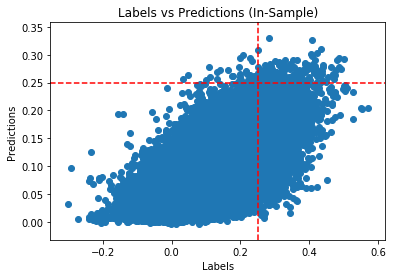

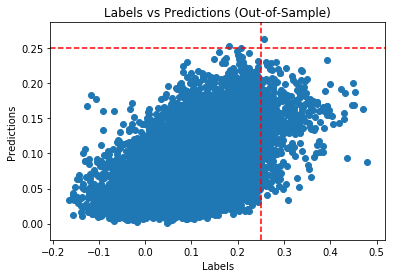

In [13]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [14]:
predictive_df = pd.DataFrame({"label": y_test.values, "pred": y_test_hat[0]})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  0.21922498031769552
Mean return for top 10 predictions:  0.20163886048183763
Mean return for top 25 predictions:  0.2071626399383824
